# Visualizing surfaces
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

We visualize the surface using napari-process-points-and-surfaces, [vedo](https://vedo.embl.es/) and [napari](https://napari.org).

In [1]:
import napari_process_points_and_surfaces as nppas

import vedo
import napari

In [2]:
surface = nppas.gastruloid()

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


The resulting object is visualized in Jupyter notebooks like this:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
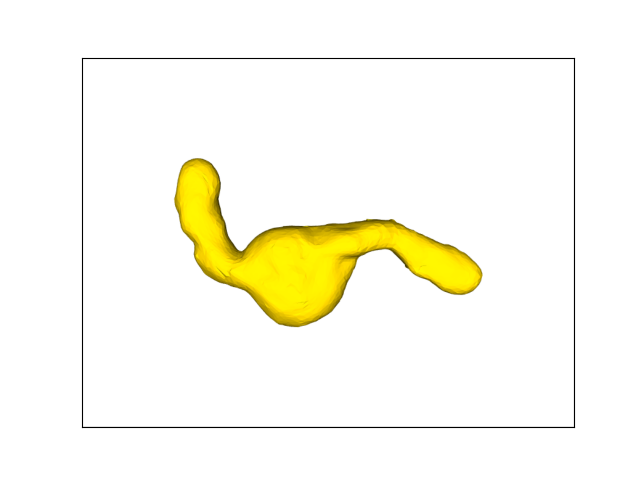

In [3]:
surface

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


(array([[ 14.17436314, 220.4059906 , 224.08285522],
        [ 13.9830761 , 208.1587677 , 220.3215332 ],
        [ 14.81901169, 219.06022644, 229.45579529],
        ...,
        [112.18208313, 356.98364258, 430.36831665],
        [112.37840271, 360.45855713, 421.84249878],
        [112.86542511, 352.25610352, 422.17349243]]),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 array([0.00025724, 0.00025043, 0.0002532 , ..., 0.00016264, 0.00015164,
        0.00016288]))
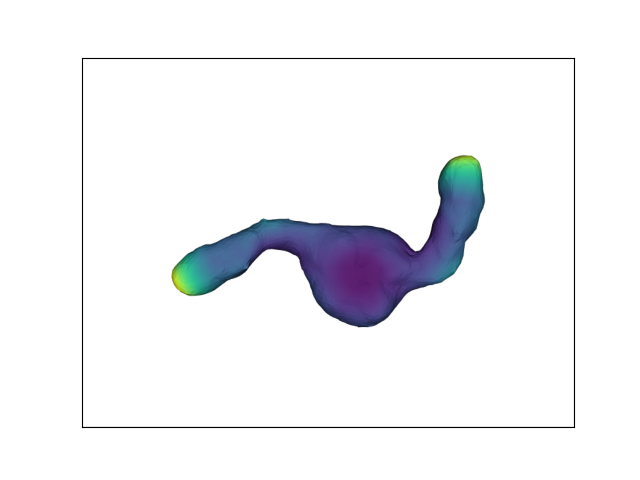
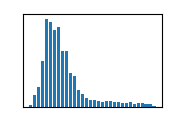

In [4]:
surface2 = nppas.add_quality(surface, nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL)
surface2.azimuth = -90
surface2

## Visualizing surfaces using napari-process-points-and-surfaces `nazimuths.show()`
You can tune the visualization using `nppas.show()`.

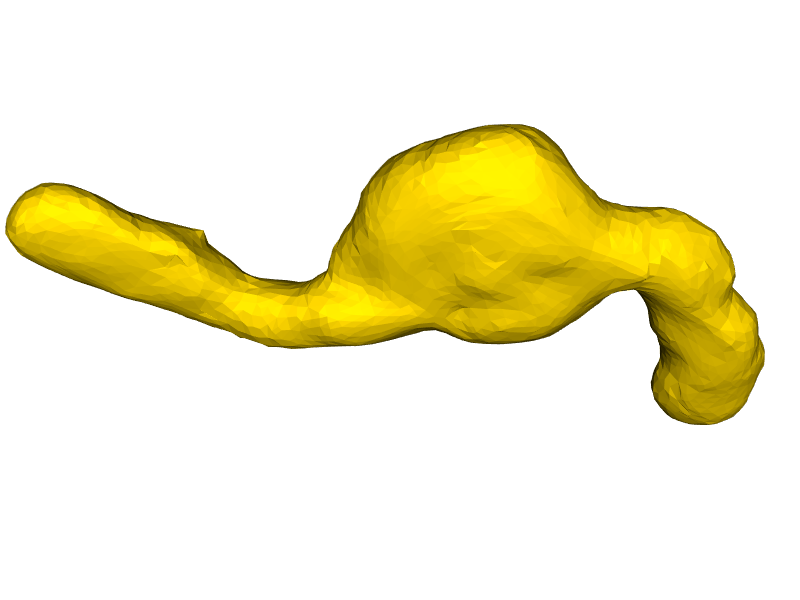

In [5]:
nppas.show(surface, zoom=1.5, azimuth=90, elevation=45)

## Visualizing surfaces using vedo
... using [vedo Plotter](https://vedo.embl.es/autodocs/content/vedo/vedo/plotter.html#Plotter).


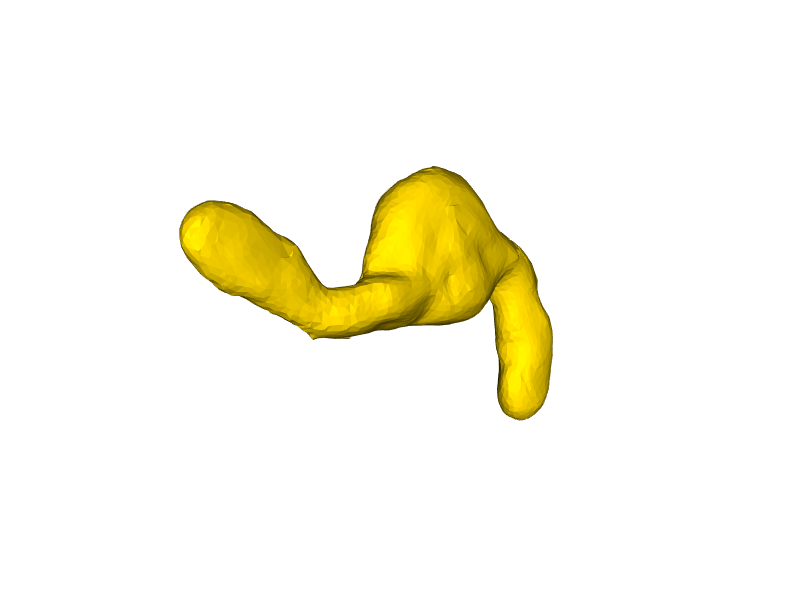

In [6]:
from vedo import Plotter

plt = Plotter()
mesh = nppas.to_vedo_mesh(surface)

plt.show(mesh, zoom=1, azimuth=45)

## Visualizing surfaces using napari


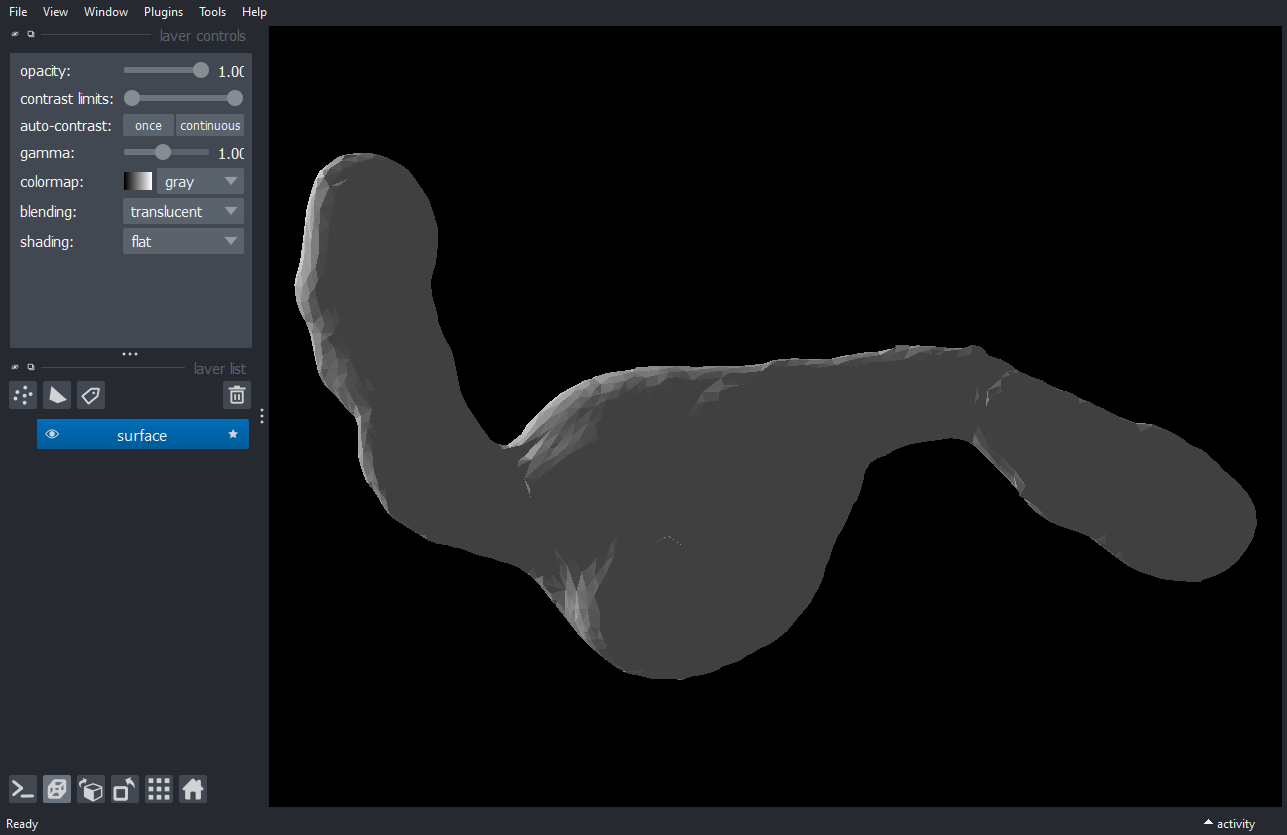

In [7]:
import napari
viewer = napari.Viewer(ndisplay=3)

viewer.add_surface(surface)

napari.utils.nbscreenshot(viewer)

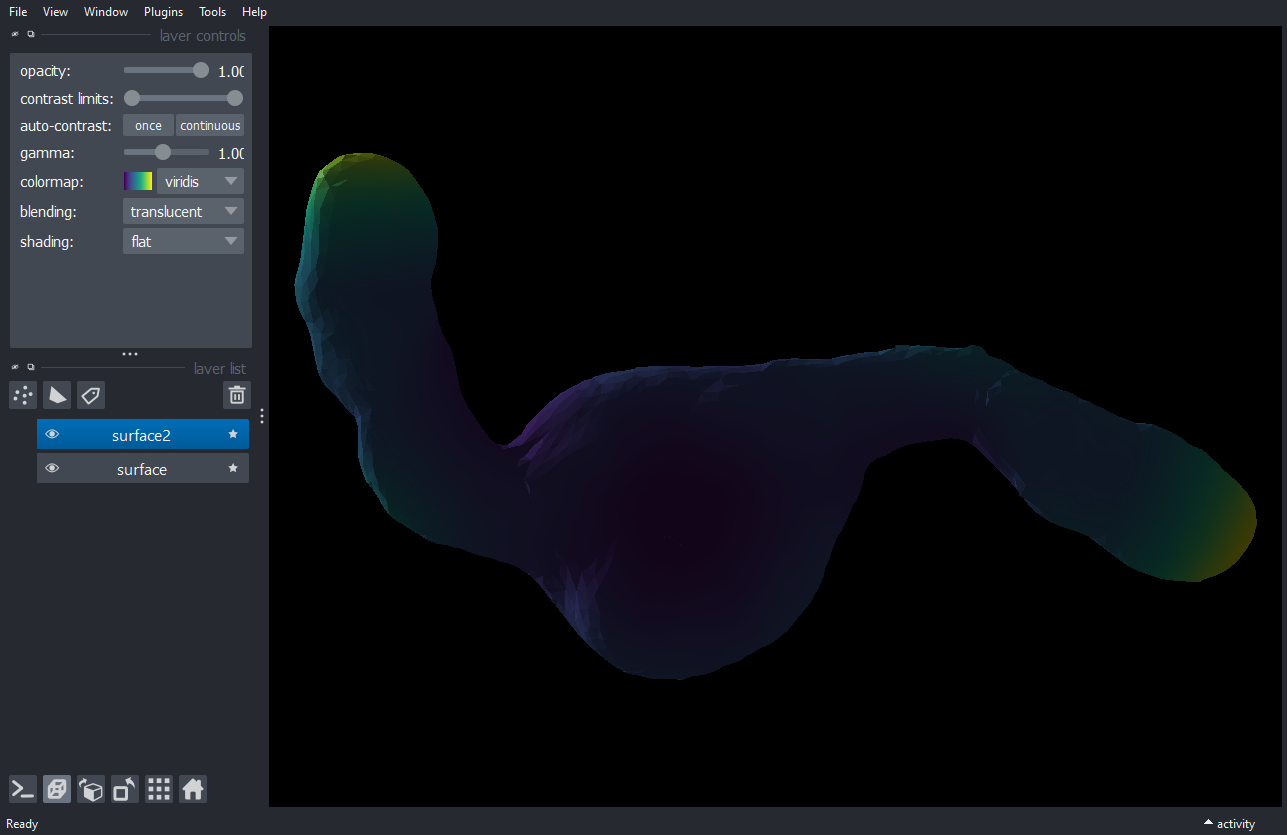

In [8]:

viewer.add_surface(surface2, colormap=surface2.cmap)

napari.utils.nbscreenshot(viewer)